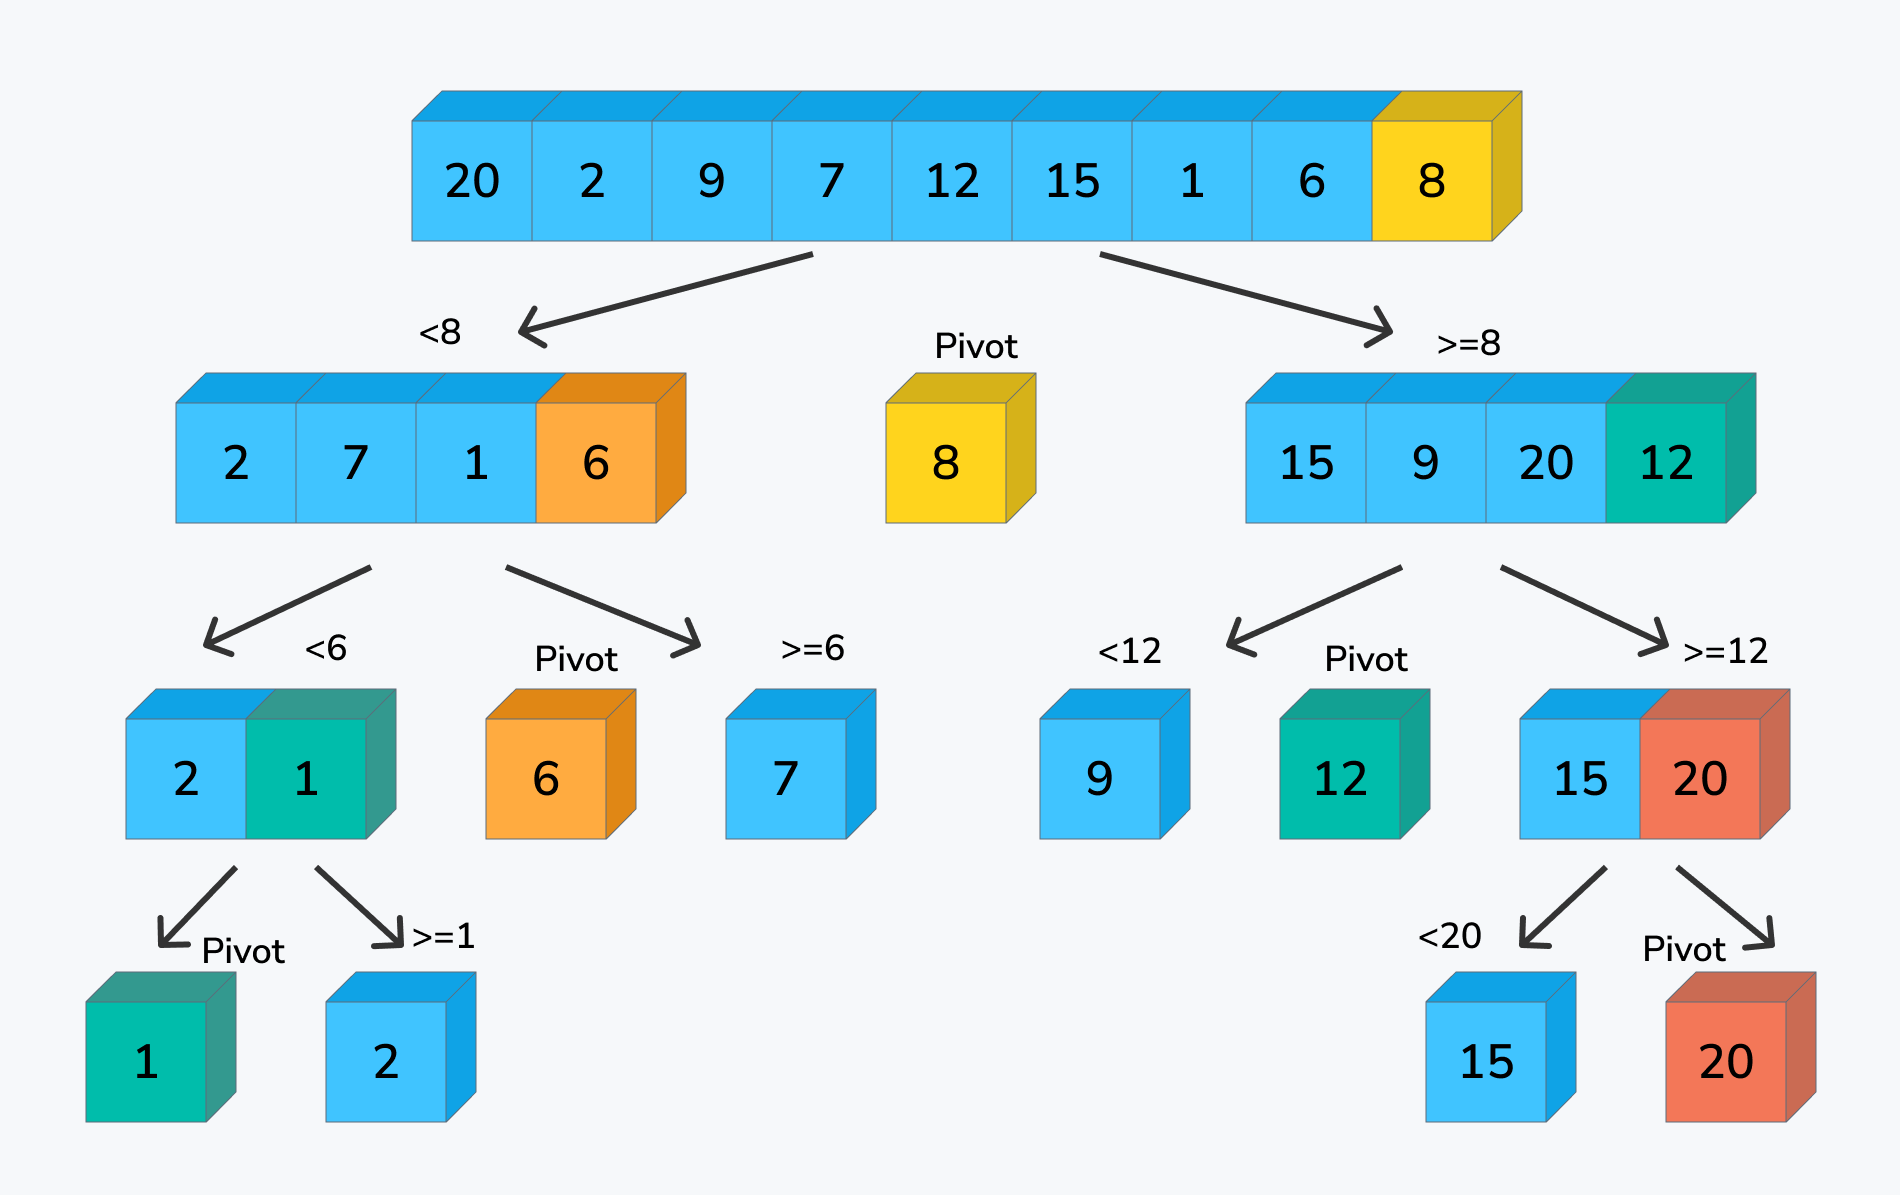

# 이 문제는 퀵 정렬로 풀었습니다.

함수는 크게 1. 퀵 정렬 함수, 2. 스위칭 함수, 3. 파티션 함수 3개로 나누어집니다.

### 1. quick_sort def: 재귀, start < end, pivot을 기준으로 3개의 케이스. 이 세가지 지점을 코드에 녹이면 됩니다

### 2. switch def: 자리 바꿔주어야 하죠!

### 3. partition def: 특수케이스, 피벗 지정 및 선택/이동, 엇갈리는 지점에서 교차해주기, 피벗 위치 반환. 이 네가지 지점을 코드에 녹이면 됩니다.

S + 1 == E는 구간에 원소가 딱 2개만 남았을 때를 의미합니다.
이 경우 일반 partition 과정을 거치지 않고, 두 값을 바로 비교 후 swap하면 끝나므로
불필요한 pivot 이동과 포인터 탐색을 생략할 수 있어 성능과 안정성이 좋아집니다.
필수는 아니지만, 경계 처리 실수를 방지하고 미세 최적화를 위해 넣는 경우가 많습니다.

i와 j는 **인덱스(자리 번호)**이며, swap(i, j)는 그 인덱스 위치의 값을 바꾸는 것입니다.
swap을 하는 이유는 i와 j가 pivot 기준에서 서로 잘못된 값을 가리키고 있기 때문입니다.
이건 i ≤ j 조건 때문이 아니라, 그 전에 이미 pivot과의 비교 과정에서
왼쪽(i)에는 pivot보다 큰 값, 오른쪽(j)에는 pivot보다 작은 값이 발견됐기 때문에 발생합니다.
i ≤ j는 단순히 “아직 두 포인터가 엇갈리지 않았다”는 안전장치 역할만 합니다.

즉, partition에서 swap은 “서로 잘못된 영역에 있는 값을 제자리에 보내기”이고,
i ≤ j는 그걸 실행할 수 있는 마지막 범위 조건일 뿐입니다.



# This problem was solved using Quick Sort.

The solution consists of three main functions:

### 1. Quick Sort function – recursion, start < end check, and three cases based on the pivot; these three points are reflected in the code.

### 2. Switch function – swaps the positions of two elements.

### 3. Partition function – special case handling, pivot selection and movement, swapping when pointers meet in the middle, and returning the pivot position; these four points are reflected in the code.

S + 1 == E means there are exactly two elements left in the current range.
In this case, instead of running the full partition process, you simply compare the two values and swap if necessary, avoiding unnecessary pivot movement and pointer scanning, which improves both performance and stability.
It’s not strictly necessary, but it’s often included to prevent boundary-handling errors and for minor optimization.

i and j are indices (position numbers), and swap(i, j) swaps the values at those index positions.
Swapping happens because i and j are pointing to values that are in the wrong partition relative to the pivot.
This is not due to the i <= j condition itself — rather, before that, the pivot comparison process has already identified that:

On the left (i), there’s a value greater than the pivot.

On the right (j), there’s a value less than the pivot.

i <= j simply ensures that the two pointers haven’t crossed yet, acting as a safety check.

In short, swapping in the partition step is about moving misplaced values back to their correct sides,
and i <= j is just the final range condition that allows the swap to occur.

In [11]:
N,K = map(int, input().split())
A = list(map(int, input().split()))

def quicksort(S, E ,K): # start, end, K
    global A
    if S < E:
        pivot = partition(S, E)
        if pivot == K:
            return
        elif K < pivot:
            quicksort(S, pivot - 1, K)
        else:
            quicksort(pivot + 1, E , K)

def swap(i,j):
    global A
    temp = A[i]
    A[i] = A[j]
    A[j] = temp

def partition(S, E):
    global A
    if S + 1 == E:
        if A[S] > A[E]:
            swap(S,E)
        return E

    M = (S + E) // 2
    swap(S,M)
    pivot = A[S]
    i = S + 1
    j = E
    while i <= j:
        while pivot < A[j] and j > 0:
            j = j - 1
        while pivot > A[i] and i < len(A) - 1:
            i = i + 1
        if i <= j:
            swap(i, j)
            i = i + 1
            j = j - 1

    A[S] = A[j]
    A[j] = pivot
    return j

quicksort(0, N - 1 , K - 1)
print(A[K-1])


 5 2
 4 1 2 3 5


2
